In [1]:
from helper import Helper
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout, Activation, MaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.losses import CategoricalCrossentropy
from time import time
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
h = Helper()

In [3]:
train_it, validation_it, test_it = h.construct_data_generator_w_validation()

Found 22050 images belonging to 3 classes.
Found 3150 images belonging to 3 classes.
Found 6300 images belonging to 3 classes.


data/train/018122.png


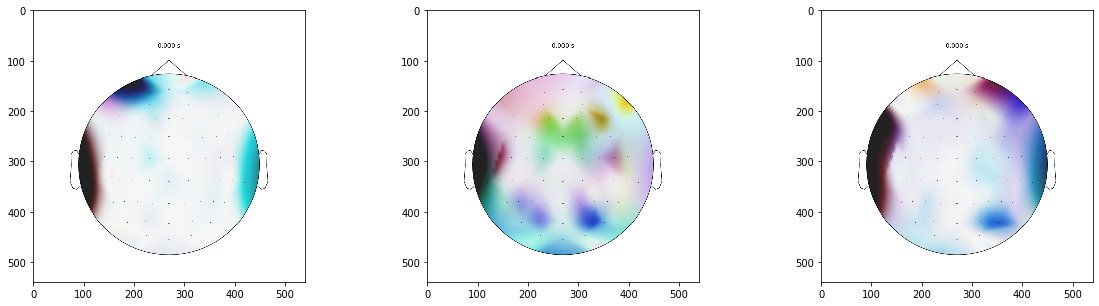

In [4]:
h.plot_examples()

data/test/08238.png


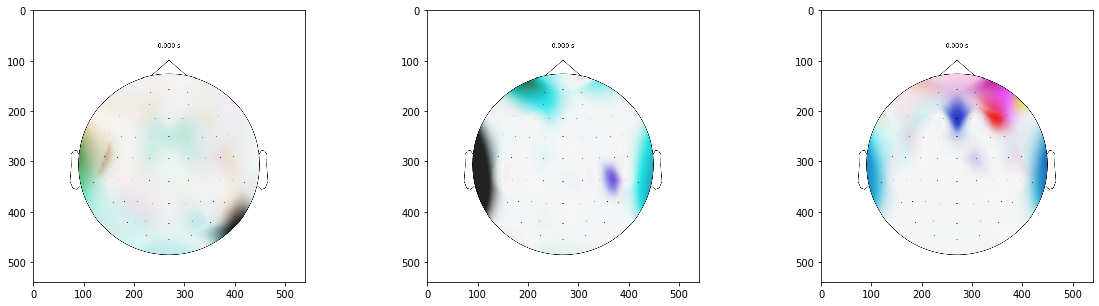

In [5]:
h.plot_examples('test')

In [6]:
def build_model(optimizer, loss, name):
    model = Sequential(name=name)
    
    model.add(Conv2D(16, (5,5), padding = 'same', input_shape = (224, 224, 3), activation = 'relu'))
    model.add(MaxPool2D(pool_size = (1,1), strides = (2,2)))
    model.add(Conv2D(32, (5,5), padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = (1,1), strides =(2,2)))
    model.add(Conv2D(64, (5,5), padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = (1,1), strides =(2,2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation = 'softmax'))
    
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    model.summary()
    
    return model

In [7]:
opt = Adam(learning_rate=0.0001)
loss = 'categorical_crossentropy'

In [8]:
tblog_path = h.logs_directory.format(time())
tb_log = TensorBoard(log_dir = tblog_path, profile_batch=0)

In [9]:
model = build_model(opt, loss, 'cnn_topomap_classification_model_150')

Model: "cnn_topomap_classification_model_150"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      1216      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
dropout (Dropout)            (

In [10]:
r = model.fit_generator(train_it, epochs=150, callbacks=[tb_log], validation_data=validation_it)

Epoch 1/150
173/173 [==============================] - 101s 584ms/step - loss: 1.0999 - accuracy: 0.3460 - val_loss: 1.0871 - val_accuracy: 0.4019
Epoch 2/150
173/173 [==============================] - 96s 555ms/step - loss: 1.0541 - accuracy: 0.4297 - val_loss: 0.9846 - val_accuracy: 0.5149
Epoch 3/150
173/173 [==============================] - 96s 556ms/step - loss: 0.9300 - accuracy: 0.5471 - val_loss: 0.8439 - val_accuracy: 0.6235
Epoch 4/150
173/173 [==============================] - 97s 558ms/step - loss: 0.8246 - accuracy: 0.6175 - val_loss: 0.7465 - val_accuracy: 0.6790
Epoch 5/150
173/173 [==============================] - 97s 558ms/step - loss: 0.7510 - accuracy: 0.6558 - val_loss: 0.6766 - val_accuracy: 0.7111
Epoch 6/150
173/173 [==============================] - 95s 549ms/step - loss: 0.7037 - accuracy: 0.6815 - val_loss: 0.6159 - val_accuracy: 0.7467
Epoch 7/150
173/173 [==============================] - 94s 541ms/step - loss: 0.6581 - accuracy: 0.7082 - val_loss: 0.5740 

Epoch 57/150
173/173 [==============================] - 93s 540ms/step - loss: 0.2589 - accuracy: 0.8968 - val_loss: 0.2633 - val_accuracy: 0.9044
Epoch 58/150
173/173 [==============================] - 93s 540ms/step - loss: 0.2573 - accuracy: 0.8933 - val_loss: 0.2590 - val_accuracy: 0.9022
Epoch 59/150
173/173 [==============================] - 93s 539ms/step - loss: 0.2486 - accuracy: 0.8996 - val_loss: 0.2551 - val_accuracy: 0.9054
Epoch 60/150
173/173 [==============================] - 93s 539ms/step - loss: 0.2513 - accuracy: 0.8959 - val_loss: 0.2564 - val_accuracy: 0.9067
Epoch 61/150
173/173 [==============================] - 93s 539ms/step - loss: 0.2508 - accuracy: 0.8984 - val_loss: 0.2517 - val_accuracy: 0.9048
Epoch 62/150
173/173 [==============================] - 93s 539ms/step - loss: 0.2486 - accuracy: 0.8987 - val_loss: 0.2484 - val_accuracy: 0.9102
Epoch 63/150
173/173 [==============================] - 93s 539ms/step - loss: 0.2408 - accuracy: 0.9033 - val_loss: 0

173/173 [==============================] - 93s 539ms/step - loss: 0.1652 - accuracy: 0.9328 - val_loss: 0.2435 - val_accuracy: 0.9213
Epoch 113/150
173/173 [==============================] - 93s 540ms/step - loss: 0.1601 - accuracy: 0.9371 - val_loss: 0.2367 - val_accuracy: 0.9210
Epoch 114/150
173/173 [==============================] - 93s 540ms/step - loss: 0.1587 - accuracy: 0.9346 - val_loss: 0.2355 - val_accuracy: 0.9190
Epoch 115/150
173/173 [==============================] - 93s 538ms/step - loss: 0.1597 - accuracy: 0.9346 - val_loss: 0.2359 - val_accuracy: 0.9238
Epoch 116/150
173/173 [==============================] - 93s 538ms/step - loss: 0.1638 - accuracy: 0.9346 - val_loss: 0.2372 - val_accuracy: 0.9200
Epoch 117/150
173/173 [==============================] - 93s 539ms/step - loss: 0.1563 - accuracy: 0.9352 - val_loss: 0.2364 - val_accuracy: 0.9210
Epoch 118/150
173/173 [==============================] - 93s 538ms/step - loss: 0.1589 - accuracy: 0.9354 - val_loss: 0.2384 -

In [11]:
evaluate = model.evaluate_generator(test_it)

In [12]:
y_prob = model.predict_generator(test_it)

In [13]:
h.save(model, r, evaluate, y_prob, 'cnn_topomap_classification_model_1_150')

model saved, path: models/cnn_topomap_classification_model_1_150.h5


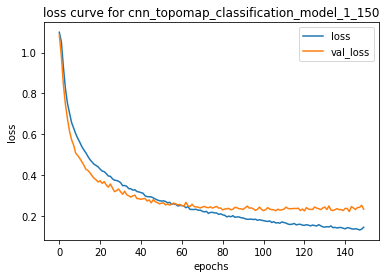

In [14]:
plt.figure()

plt.title('loss curve for cnn_topomap_classification_model_1_150')

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')

plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.savefig('results/loss curve for cnn_topomap_classification_model_1_150.png')

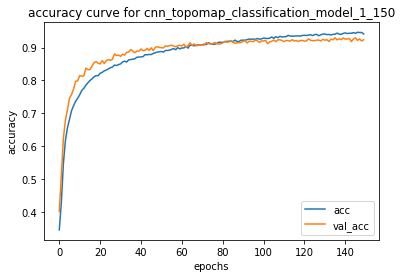

In [15]:
plt.figure()

plt.title('accuracy curve for cnn_topomap_classification_model_1_150')

plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.savefig('results/accuracy curve for cnn_topomap_classification_model_1_150.png')